# Data Science And Business Analytics Internship - The Sparks Foundation

## Task#2 Prediction Using Unsupervised ML 
    From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
    Dataset: https://bit.ly/3kXTdox
    Task submitted by: Syeda Manal

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

#### Importing Dataset

In [5]:
df = pd.read_csv('Iris.csv')
print('Data is loaded successfully')

Data is loaded successfully


#### Take a peek into Data

In [103]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.shape

(150, 6)

Our Dataframe has **150** records and **6** features

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


All columns are numeric except for one column i.e. Species.
Also we can see that there are no null values.

In [11]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Prepare Data 

#### Remove target column as our problem is for Unsupervised ML

In [105]:
# We need to remove Species column for unsupervised ML
unsuper_df = df.drop(['Species', 'Id'], axis = 1)
unsuper_df = unsuper_df.values

#### How do you find the optimum number of clusters for K Means? How does one determine the value of K?
I will use Silhouette Analysis to determine optimal number of clusters

##### Perform Comparative Analysis to Determine Best Value of K Using Silhouette Plot

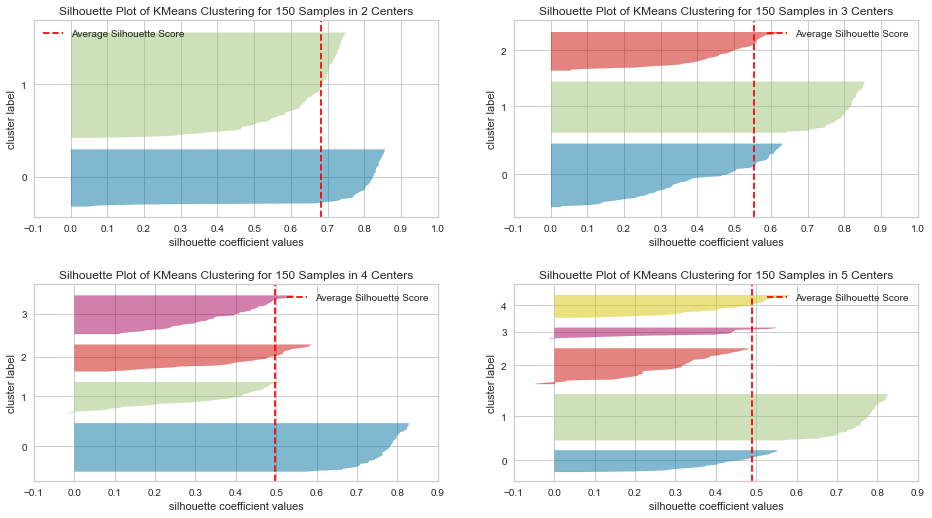

In [47]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(14,8))
fig.tight_layout(pad = 4)
for n in n_clusters:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(n, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(unsuper_df)
    visualizer.finalize()

Here is the Silhouette analysis done on the above plots to select an optimal value for n_clusters.

- The value of n_clusters as 4 and 5 looks to be suboptimal for the given data due to the following reasons:
 - Presence of clusters with below-average silhouette scores 
 - Wide fluctuations in the size of the silhouette plots.
- The value of 2 and 3 for n_clusters looks to be the optimal one. The silhouette score for each cluster is above average silhouette scores. Also, the fluctuation in size is similar. The thickness of the silhouette plot representing each cluster also is a deciding point. For the plot with n_cluster 3 (top right), the thickness is more uniform than the plot with n_cluster as 2 (top left) with one cluster thickness much more than the other.<br>
Thus, we can select the optimal number of clusters as ***3***.

#### Applying kmeans to the dataset / Creating the kmeans classifier

In [104]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(unsuper_df)

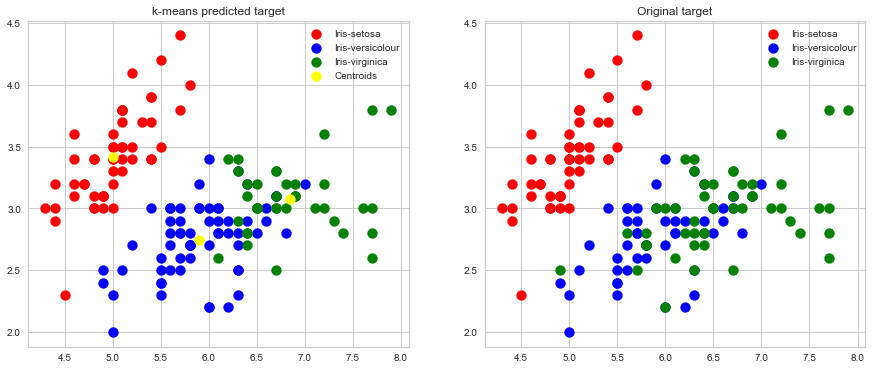

In [102]:
# Visualising the clusters - On the first two columns
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].scatter(unsuper_df[y_kmeans == 1, 0], unsuper_df[y_kmeans == 1, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
ax[0].scatter(unsuper_df[y_kmeans == 2, 0], unsuper_df[y_kmeans == 2, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
ax[0].scatter(unsuper_df[y_kmeans == 0, 0], unsuper_df[y_kmeans == 0, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

ax[0].set_title('k-means predicted target')
ax[1].set_title('Original target')
ax[1].scatter(df.SepalLengthCm[df['Species'] == 'Iris-setosa'], df.SepalWidthCm[df['Species'] == 'Iris-setosa'], 
            s = 100, c = 'red', label = 'Iris-setosa')
ax[1].scatter(df.SepalLengthCm[df['Species'] == 'Iris-versicolor'], df.SepalWidthCm[df['Species'] == 'Iris-versicolor'], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
ax[1].scatter(df.SepalLengthCm[df['Species'] == 'Iris-virginica'], df.SepalWidthCm[df['Species'] == 'Iris-virginica'],
            s = 100, c = 'green', label = 'Iris-virginica')


# Plotting the centroids of the clusters
ax[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

ax[0].legend()
ax[1].legend()

Our model has done tremendous job doing clustering 